# Import

In [41]:
# import librairies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

filepath = 'https://raw.githubusercontent.com/igoekce/netflixrecommender/master/netflix_titles.csv'

df = pd.read_csv(filepath)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [43]:
#Erzeugung eines Datensatzes mit 20% der Daten
df = df.sample(int(df.shape[0]*0.2))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 5599 to 1259
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1246 non-null   int64 
 1   type          1246 non-null   object
 2   title         1246 non-null   object
 3   director      845 non-null    object
 4   cast          1127 non-null   object
 5   country       1144 non-null   object
 6   date_added    1242 non-null   object
 7   release_year  1246 non-null   int64 
 8   rating        1243 non-null   object
 9   duration      1246 non-null   object
 10  listed_in     1246 non-null   object
 11  description   1246 non-null   object
dtypes: int64(2), object(10)
memory usage: 126.5+ KB


In [44]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5599,80216752,TV Show,Explained,NaN,NaN,United States,"September 26, 2019",2019,TV-14,2 Seasons,Docuseries,This enlightening series from Vox digs into a ...
1692,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,"Gerard Butler, Aaron Eckhart, Morgan Freeman, ...",United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
5955,80091742,TV Show,Last Chance U,NaN,"John Franklin III, DJ Law, Buddy Stephens, Bri...",United States,"July 19, 2019",2019,TV-MA,4 Seasons,Docuseries,In a docuseries set at one of NCAA football's ...
3381,81144867,Movie,Saving Zoë,Jeffrey G. Hunt,"Laura Marano, Vanessa Marano, Christopher Tava...",United States,"January 15, 2020",2019,R,95 min,Dramas,A reserved high school freshman acts out when ...
1710,80996626,TV Show,Dance & Sing with True,NaN,"Michela Luci, Jamie Watson, Anna Claire Bartla...",NaN,"May 18, 2018",2018,TV-Y,1 Season,Kids' TV,True and her friends are making music – and th...
...,...,...,...,...,...,...,...,...,...,...,...,...
3856,81026327,Movie,Firebrand,Aruna Raje,"Usha Jadhav, Girish Kulkarni, Sachin Khedekar,...",India,"February 22, 2019",2019,TV-MA,117 min,"Dramas, International Movies",While she successfully advocates for her femal...
4438,80081754,TV Show,Power Rangers Dino Charge,NaN,"Brennan Mejia, Camille Hyde, Yoshi Sudarso, Mi...",United States,"December 2, 2015",2015,TV-Y7,1 Season,Kids' TV,"In the time of dinosaurs, the ancient and powe..."
5063,60010514,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,"August 1, 2019",1997,R,154 min,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...
1029,80009431,Movie,Virunga,Orlando von Einsiedel,NaN,"United Kingdom,","November 7, 2014",2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...


1246 tilles = missing **director**, **cast**, **country**, date_added, rating

#separating columns multi text

In [45]:
df_sep = df.copy()
df_sep = df_sep.dropna()

In [46]:
df_sep

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1692,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,"Gerard Butler, Aaron Eckhart, Morgan Freeman, ...",United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
3381,81144867,Movie,Saving Zoë,Jeffrey G. Hunt,"Laura Marano, Vanessa Marano, Christopher Tava...",United States,"January 15, 2020",2019,R,95 min,Dramas,A reserved high school freshman acts out when ...
5417,80015280,Movie,Bibi & Tina,Detlev Buck,"Lina Larissa Strahl, Lisa-Marie Koroll, Louis ...",Germany,"April 15, 2017",2014,TV-PG,97 min,"Children & Family Movies, Music & Musicals",Teen witch Bibi and horse-loving Tina face tro...
1753,70153178,Movie,Once Upon a Time in Mumbaai,Milan Luthria,"Ajay Devgn, Emraan Hashmi, Kangana Ranaut, Pra...",India,"May 15, 2019",2010,NR,133 min,"Dramas, International Movies, Music & Musicals",Mumbai's top mob boss rules the underworld wit...
972,70153553,Movie,Harud,Aamir Bashir,"Mohammad Amir Naji, Shahnawaz Bhat, Shamim Bas...",India,"October 1, 2016",2010,TV-14,100 min,"Dramas, International Movies",A young Kashmiri man sets out to escape to Pak...
...,...,...,...,...,...,...,...,...,...,...,...,...
571,70082633,Movie,Bhool Bhulaiyaa,Priyadarshan,"Akshay Kumar, Vidya Balan, Ameesha Patel, Shin...",India,"October 22, 2017",2007,TV-14,148 min,"Dramas, International Movies, Thrillers",Siddharth dismisses warnings that his palace m...
2284,80134438,Movie,Romantik Komedi,Ketche,"Sedef Avcı, Cemal Hünal, Begüm Kütük, Engin Al...",Turkey,"March 10, 2017",2010,NR,110 min,"Comedies, International Movies, Romantic Movies",Bored with her life and inspired by a friend's...
3856,81026327,Movie,Firebrand,Aruna Raje,"Usha Jadhav, Girish Kulkarni, Sachin Khedekar,...",India,"February 22, 2019",2019,TV-MA,117 min,"Dramas, International Movies",While she successfully advocates for her femal...
5063,60010514,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,"August 1, 2019",1997,R,154 min,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...


In [47]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [48]:
df_sep = splitDataFrameList(df_sep,'cast',',')
df_sep = splitDataFrameList(df_sep,'country',',')
df_sep = splitDataFrameList(df_sep,'listed_in',',')
df_sep

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,Gerard Butler,United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
1,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,Aaron Eckhart,United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
2,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,Morgan Freeman,United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
3,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,Finley Jacobsen,United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
4,70259801,Movie,Olympus Has Fallen,Antoine Fuqua,Dylan McDermott,United States,"May 2, 2019",2013,R,119 min,Action & Adventure,A disgraced Secret Service agent must come to ...
...,...,...,...,...,...,...,...,...,...,...,...,...
17283,80200267,Movie,The Ballad of Buster Scruggs,"Joel Coen, Ethan Coen",Tom Waits,United States,"November 16, 2018",2018,R,133 min,Dramas,"Ranging from absurd to profound, these Western..."
17284,80200267,Movie,The Ballad of Buster Scruggs,"Joel Coen, Ethan Coen",Zoe Kazan,United States,"November 16, 2018",2018,R,133 min,Comedies,"Ranging from absurd to profound, these Western..."
17285,80200267,Movie,The Ballad of Buster Scruggs,"Joel Coen, Ethan Coen",Zoe Kazan,United States,"November 16, 2018",2018,R,133 min,Dramas,"Ranging from absurd to profound, these Western..."
17286,80200267,Movie,The Ballad of Buster Scruggs,"Joel Coen, Ethan Coen",Brendan Gleeson,United States,"November 16, 2018",2018,R,133 min,Comedies,"Ranging from absurd to profound, these Western..."


#Function generating G for model
source = title

target = could be 2 to 7 features

In [49]:
def G_generator(features):
  df1 = pd.DataFrame(columns = ['title', 'value']) 
  for feature in features:
    print(feature)
    df_temp = df_sep[['title', feature]].copy()
    df_temp.columns = ['title', 'value']
    df1 = pd.concat([df1, df_temp], axis=0)
  return df1
#  G = nx.from_pandas_edgelist(df1, source='title', target='value')

#abfangen von leeren Zellen?

In [20]:
print('possible cols w/o title:', df_sep.columns)

possible cols w/o title: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [53]:
#PLEASE INSERT YOUR COLS
features = ['rating', 'cast', 'release_year', 'duration']
features = ['rating', 'cast']

In [54]:
df_model = G_generator(features)

rating
cast


,title,value
0,Olympus Has Fallen,R
1,Olympus Has Fallen,R
2,Olympus Has Fallen,R
3,Olympus Has Fallen,R
4,Olympus Has Fallen,R
...,...,...
17283,The Ballad of Buster Scruggs,Tom Waits
17284,The Ballad of Buster Scruggs,Zoe Kazan
17285,The Ballad of Buster Scruggs,Zoe Kazan
17286,The Ballad of Buster Scruggs,Brendan Gleeson


In [56]:
G_generator(['director', 'cast'])

director
cast


,title,value
0,Olympus Has Fallen,Antoine Fuqua
1,Olympus Has Fallen,Antoine Fuqua
2,Olympus Has Fallen,Antoine Fuqua
3,Olympus Has Fallen,Antoine Fuqua
4,Olympus Has Fallen,Antoine Fuqua
...,...,...
17283,The Ballad of Buster Scruggs,Tom Waits
17284,The Ballad of Buster Scruggs,Zoe Kazan
17285,The Ballad of Buster Scruggs,Zoe Kazan
17286,The Ballad of Buster Scruggs,Brendan Gleeson


#DF Preparation (nott needed anymore)
Available Nodes:
'directors', 'actors' , 'countries', 'release_year', 'rating', 'duration', 'categories'

In [ ]:
# convert columns "director, listed_in, cast and country" in columns that contain a real list
# the strip function is applied on the elements
# if the value is NaN, the new column contains a empty list []
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,directors,categories,actors,countries
4889,80134952,Movie,Bad Rap,Salima Koroma,"Jonathan Park, Awkwafina, David Lee, Richard Lee","United States, Canada","August 21, 2017",2016,TV-MA,83 min,"Documentaries, Music & Musicals",Four young Asian-American rappers strive to ac...,[Salima Koroma],"[Documentaries, Music & Musicals]","[Jonathan Park, Awkwafina, David Lee, Richard ...","[United States, Canada]"
1820,81069255,Movie,John & Yoko: Above Us Only Sky,Michael Epstein,"John Lennon, Yoko Ono",United Kingdom,"May 1, 2019",2018,TV-14,90 min,"Documentaries, Music & Musicals",Featuring interviews and never-before-seen foo...,[Michael Epstein],"[Documentaries, Music & Musicals]","[John Lennon, Yoko Ono]",[United Kingdom]
1351,80216003,Movie,Apache Warrior,"David Salzberg, Christian Tureaud",NaN,United States,"November 1, 2019",2017,TV-MA,89 min,Documentaries,Recovered cockpit footage and telling intervie...,"[David Salzberg, Christian Tureaud]",[Documentaries],[],[United States]
519,80235268,Movie,Jefe,Sergio Barrejón,"Luis Callejo, Juana Acosta, Carlo D'Ursi, Jose...","Spain, Portugal","October 26, 2018",2018,TV-MA,90 min,"Comedies, Dramas, International Movies","A rude, self-centered businessman seems to be ...",[Sergio Barrejón],"[Comedies, Dramas, International Movies]","[Luis Callejo, Juana Acosta, Carlo D'Ursi, Jos...","[Spain, Portugal]"
5219,80185032,Movie,Behind the Curtain: Todrick Hall,Katherine Fairfax Wright,Todrick Hall,United States,"April 5, 2018",2017,TV-MA,100 min,"Documentaries, LGBTQ Movies, Music & Musicals",Follow singer and YouTube sensation Todrick Ha...,[Katherine Fairfax Wright],"[Documentaries, LGBTQ Movies, Music & Musicals]",[Todrick Hall],[United States]


In [ ]:
df1 = pd.DataFrame( np.concatenate( (
    df[['title', 'directors']].values, 
    df[['title', 'actors']].values, 
    df[['title', 'countries']].values, 
    df[['title', 'release_year']].values, 
    df[['title', 'rating']].values, 
    df[['title', 'duration']].values, 
    df[['title', 'categories']].values, 
    ), axis=0 ) )
df1.columns = ['title', 'value']
df1

,title,value
0,Bad Rap,[Salima Koroma]
1,John & Yoko: Above Us Only Sky,[Michael Epstein]
2,Apache Warrior,"[David Salzberg, Christian Tureaud]"
3,Jefe,[Sergio Barrejón]
4,Behind the Curtain: Todrick Hall,[Katherine Fairfax Wright]
...,...,...
8717,Chris Rock: Tamborine,[Stand-Up Comedy]
8718,Harry Benson: Shoot First,[Documentaries]
8719,Lolita,"[Classic Movies, Dramas, Romantic Movies]"
8720,"Thelonious Monk: Straight, No Chaser","[Documentaries, Music & Musicals]"


#Yasin POC

In [ ]:
#df['temp_genre'] = df['listed_in'].apply(lambda genres: genres.split(',')[0])

In [ ]:
#df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,temp_genre
4149,80115673,Movie,Reggie Watts: Spatial,Benjamin Dickinson,Reggie Watts,United States,"December 6, 2016",2016,TV-MA,62 min,"Music & Musicals, Stand-Up Comedy",The comic innovator delivers a surreal set ble...,Music & Musicals
1803,80216756,TV Show,Jailbirds,NaN,NaN,NaN,"May 10, 2019",2019,TV-MA,1 Season,Reality TV,"At the Sacramento County Jail, incarcerated wo...",Reality TV
6035,81031262,TV Show,Man Like Mobeen,NaN,NaN,United Kingdom,"February 8, 2019",2019,TV-MA,2 Seasons,"British TV Shows, TV Comedies","Mobeen is trying to be a good friend, follow t...",British TV Shows
803,81003460,Movie,House of the Witch,Alex Merkin,"Emily Bader, Darren Mann, Michelle Randolph, C...",United States,"October 1, 2019",2017,TV-14,86 min,Horror Movies,A group of daring teens finds themselves in a ...,Horror Movies
3351,80133139,Movie,Enlighten Us,Jenny Carchman,James Arthur Ray,United States,"January 18, 2017",2016,TV-14,93 min,Documentaries,This documentary digs deep to recount the saga...,Documentaries
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,80114804,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,"June 4, 2019",2015,TV-MA,12 min,"Dramas, International Movies, Sci-Fi & Fantasy","Despondent on a desolate island, a suicidal sh...",Dramas
5267,80164212,Movie,Small Crimes,Evan Katz,"Nikolaj Coster-Waldau, Gary Cole, Molly Parker...","Canada, United States","April 28, 2017",2017,TV-MA,95 min,"Dramas, Thrillers","After serving a six-year prison sentence, an e...",Dramas
3923,81004511,Movie,Studio 54,Matt Tyrnauer,NaN,United States,"February 16, 2019",2018,TV-MA,99 min,Documentaries,This documentary follows the rapid rise and fa...,Documentaries
5154,80185722,Movie,The Women Who Kill Lions,Neil Rawles,NaN,United Kingdom,"August 1, 2017",2016,TV-MA,47 min,"Documentaries, International Movies",Experience an up-close look at the controversi...,Documentaries


In [ ]:
#df1 = pd.DataFrame( np.concatenate( (df[['title', 'temp_genre']].values, df[['title', 'rating']].values), axis=0 ) )
#df1.columns = ['title', 'value']
#df1

,title,value
0,Shadow,Action & Adventure
1,Nobel,International TV Shows
2,It Takes Two,Children & Family Movies
3,Back Street Girls -GOKUDOLS-,Anime Series
4,Target,Comedies
...,...,...
2487,High Risk,TV-G
2488,Head On,TV-MA
2489,The Original Kings of Comedy,R
2490,Fireworks,TV-PG


In [ ]:
df['title'].unique().shape[0] * df['temp_genre'].unique().shape[0] * df['rating'].unique().shape[0]

614790

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(df1, source='title', target='value')

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1290
Number of edges: 2489
Average degree:   3.8589


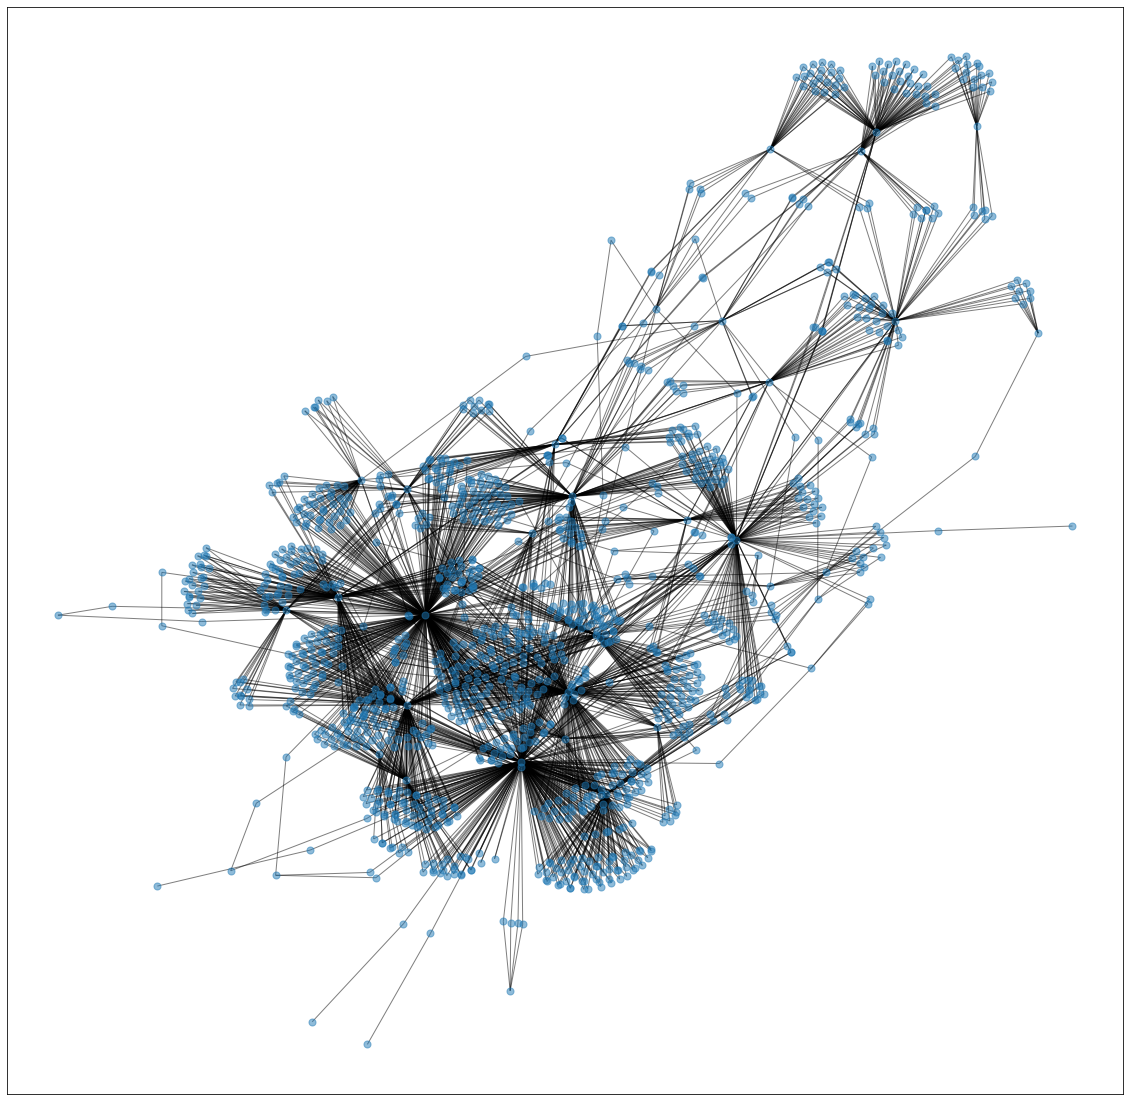

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=False, alpha=0.5, node_size=50)

In [ ]:
i = 0
for neighbor in G.neighbors('Portlandia'):
  print(neighbor)
  i += 1
  if i == 5:
    break

NetworkXError: ignored

In [ ]:
G.number_of_edges()

2489

In [ ]:
jacc_gen = nx.jaccard_coefficient(G)

In [ ]:
jacc_dict = {}
for u,v,p in jacc_gen:
  jacc_dict[(u, v)] = p

In [ ]:
for key in jacc_dict:
  print(key, jacc_dict[key])
  break

(nan, 'La Mante') 0.0


In [ ]:
results = {}
for key in jacc_dict:
  if 'Portlandia' in key:
    results[key] = jacc_dict[key]

In [ ]:
import operator
results_sorted = sorted(results.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
#Nachbarn von 'Portlandia': Nur 'The Office ...' hat gleiches Genre und Rating wie 'Portlandia' (1.0 Koeff)
#Bei Koeffe von 0.333 hat Portlandia entweder das Genre oder Rating gemeinsam, aber nicht beides
results_sorted[:20]

[]

In [ ]:
df.loc[df['temp_genre'] == 'Children & Family Movies', 'title'].unique()

array(['It Takes Two', 'Bibi & Tina: Tohuwabohu Total',
       'Willy Wonka & the Chocolate Factory',
       "Rocko's Modern Life: Static Cling", 'Next Gen',
       'The Nutcracker and the Four Realms',
       'My Little Pony Equestria Girls: Friendship Games',
       'Stretch Armstrong: The Breakout',
       'Power Rangers Super Samurai: Stuck on Christmas',
       'Monster High: Scaris, City of Frights', 'Holly Star',
       'Stuart Little', 'Monster Family',
       'Puss in Book: Trapped in an Epic Tale', "Charlotte's Web",
       'The Guardian Brothers', 'Harriet the Spy: Blog Wars',
       'Monster House', 'Hey Arnold! The Jungle Movie', 'Little Monsters',
       'Christopher Robin', 'Barbie Star Light Adventure',
       'My Little Pony Equestria Girls: Rollercoaster of Friendship',
       'Tarzan 2', 'Krish Trish and Baltiboy: Face Your Fears',
       'Spookley the Square Pumpkin',
       'John Mulaney & The Sack Lunch Bunch',
       'Bruno and Boots: The Wizzle War', 'Mary Poppi

# Ideen

Ideen:

- Es gibt deutlich mehr Filme als Serien, d.h. ggf. prüfen, ob der eingegebene Name ein Film oder eine Serie ist (oder ob er überhaupt auftaucht).
- Filmtitel ist **nicht** unique. Das sollten wir klären. Die Duplikate führen beim Grafen zu Connections, welche eigentlich nicht da sein sollten.
- ca. 1/3 der Directors fehlen (kriegen wir die woanders her? z.B. IMDB)
- Cast müssen wir ändern (ggf. Sparce Matrix bauen, d.h. Spalten sind die Autorennamen und Zeilen sind die Filme)
- Country ist eher US-zentriert.
- `date_added` rausschmeißen?
- `release_year` ist interessant (z.B. 80er Filme etc.). Können wir daraus Kategorien bilden? (oder z.B. Filme +/- 5 Jahre)
- `rating` ist relevant
- `duration` müssen wir unterscheiden zwischen Serie und Film.
- `listed_in` müssen wir auch klären (Sparse Matrix wie bei den Schauspielern)
- `Description` - NLP Task?


- Allan Marriott - Film 1
- Allan Marriott - 2013
- Allan Marriott - Comedy
...
- Comedy - Allan Marriott

.drop_duplicates()

In [ ]:
df[['title', 'release_year', 'cast']]

,title,release_year,cast
1032,Shadow,2018,"Deng Chao, Sun Li, Ryan Cheng, Wang Qianyuan, ..."
4613,Nobel,2016,"Aksel Hennie, Tuva Novotny, Anders Danielsen L..."
1176,It Takes Two,1995,"Kirstie Alley, Steve Guttenberg, Mary-Kate Ols..."
4589,Back Street Girls -GOKUDOLS-,2018,"Daisuke Ono, Satoshi Hino, Kazuyuki Okitsu, Yu..."
1201,Target,2018,"Raditya Dika, Cinta Laura Kiehl, Samuel Rizal,..."
...,...,...,...
369,High Risk,1988,NaN
4843,Head On,1998,"Alex Dimitriades, Paul Capsis, Julian Garner, ..."
3586,The Original Kings of Comedy,2000,"Steve Harvey, D.L. Hughley, Cedric the Enterta..."
4352,Fireworks,2017,"Yuki Kaji, Nobuo Tobita, Michiko Neya, Mitsuru..."


df['cast']

In [ ]:
 # function('title', [features], count=5)
features = 'Genre'
features = 'Genres', 'Year', 'Country', 'Cast'...

# function('title', 'Genre', count=3) + function('title', 'Cast', count=2)


SyntaxError: ignored

In [ ]:
len(df['title'].unique())

# IMDB

In [25]:
!pip install git+https://github.com/alberanid/imdbpy

  Cloning https://github.com/alberanid/imdbpy to /tmp/pip-req-build-1t7vdwfy
  Running command git clone -q https://github.com/alberanid/imdbpy /tmp/pip-req-build-1t7vdwfy
  Created wheel for IMDbPY: filename=IMDbPY-2020.9.29-cp36-none-any.whl size=302743 sha256=92fc7842da0932bad2403d8ebe2a2245a67250b982181a201004781d69fb809e
  Stored in directory: /tmp/pip-ephem-wheel-cache-cljh3hij/wheels/0f/09/61/190df5e0276765680540f1562f2abca80e725a7e48595e993f
Successfully built IMDbPY


In [26]:
from imdb import IMDb

# 'Norm of the North: King Sized Adventure'
# create an instance of the IMDb class
ia = IMDb()


In [32]:
df[df['director'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2689,80162114,TV Show,My Little Baby,NaN,"Ji-ho Oh, Soo-kyung Lee, Min-jae Kim, Ji-hyun Nam",South Korea,"June 10, 2017",2016,TV-14,1 Season,"Crime TV Shows, International TV Shows, Korean...",A top detective in the violent crimes unit bec...
4871,80243728,TV Show,Deadwind,NaN,"Pihla Viitala, Lauri Tilkanen, Jani Volanen, T...","Finland, Germany","August 23, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Just months after a tragic loss, detective Sof..."
4992,80195357,TV Show,Cannon Busters,NaN,"Yoshitsugu Matsuoka, Hinaki Yano, Shiori Izawa...","United States, Japan","August 15, 2019",2019,TV-MA,1 Season,"Anime Series, International TV Shows",Immortal renegade Philly the Kid and his trans...
1429,81035120,Movie,True: Grabbleapple Harvest,NaN,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",NaN,"November 1, 2019",2019,TV-Y,24 min,Movies,It's Grabbleapple harvest season in the Rainbo...
5146,80185622,TV Show,Nurses Who Kill,NaN,NaN,United Kingdom,"August 1, 2017",2016,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries","Top medical, criminal and psychological expert..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2823,80210294,TV Show,Twelve Forever,NaN,"Kelsy Abbott, Antony Del Rio, Jaylen Barron, M...",United States,"July 29, 2019",2019,TV-Y7,1 Season,Kids' TV,Reggie's wild imagination unlocks a weird and ...
5955,80091742,TV Show,Last Chance U,NaN,"John Franklin III, DJ Law, Buddy Stephens, Bri...",United States,"July 19, 2019",2019,TV-MA,4 Seasons,Docuseries,In a docuseries set at one of NCAA football's ...
3089,81099976,TV Show,Titipo Titipo,NaN,"Jeon Hae-ri, Kim Eun-ah, Hong Bum-ki, Nam Do-h...",NaN,"July 1, 2019",2018,TV-Y,1 Season,"Kids' TV, Korean TV Shows",Titipo the train is out to prove that he's got...
4135,81146370,Movie,Spirit Riding Free: Spirit of Christmas,NaN,"Amber Frank, Bailey Gambertoglio, Sydney Park,...",United States,"December 6, 2019",2019,TV-Y7,46 min,Children & Family Movies,Lucky and friends must figure out how to get h...


In [33]:
ia.search_movie('My Little Baby	')

[<Movie id:5546516[http] title:_"My Little Baby" (2016)_>,
 <Movie id:6236592[http] title:_My Little Baby (2019)_>,
 <Movie id:1579638[http] title:_My Little Baby (1916)_>,
 <Movie id:6892950[http] title:_My Little Baby, Jaya (2017)_>,
 <Movie id:6677776[http] title:_"My Little Baby" Episode #1.5 (2016)_>,
 <Movie id:6677778[http] title:_"My Little Baby" Episode #1.6 (2016)_>,
 <Movie id:6677792[http] title:_"My Little Baby" Episode #1.13 (2016)_>,
 <Movie id:6677774[http] title:_"My Little Baby" Episode #1.4 (2016)_>,
 <Movie id:8569206[http] title:_Little Baby (2019)_>,
 <Movie id:7001042[http] title:_Hush Little Baby (2017) (TV)_>,
 <Movie id:10051854[http] title:_"Little Baby Bum" (2011)_>,
 <Movie id:0395140[http] title:_My Little Bride (2004)_>,
 <Movie id:1031294[http] title:_Hush Little Baby (2007) (TV)_>,
 <Movie id:2559620[http] title:_Little Baby Jesus (2013)_>,
 <Movie id:0868745[http] title:_"Teletubbies" Little Baby (1997)_>,
 <Movie id:10741912[http] title:_"Two Dimes" L

In [34]:
# get a movie
movie = ia.get_movie(5546516)

# print the names of the directors of the movie
movie

<Movie id:5546516[http] title:_"My Little Baby" (2016)_>

In [36]:
movie.keys()

['original title',
 'cast',
 'genres',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'certificates',
 'number of seasons',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'languages',
 'title',
 'year',
 'kind',
 'series years',
 'akas',
 'seasons',
 'writer',
 'distributors',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

In [30]:
movie['countries'], movie['cast']

(['Japan'],
 [<Person id:5137121[http] name:_Natsuki Hanae_>,
  <Person id:5190250[http] name:_Risa Taneda_>,
  <Person id:4785118[http] name:_Ayane Sakura_>,
  <Person id:4986657[http] name:_Ryôta Ôsaka_>,
  <Person id:2971661[http] name:_Jennifer Alyx_>,
  <Person id:4285676[http] name:_Megan Crockett_>,
  <Person id:4808080[http] name:_Erika Harlacher_>,
  <Person id:4582537[http] name:_Erik Scott Kimerer_>,
  <Person id:2186567[http] name:_Christina N. McBride_>,
  <Person id:4481399[http] name:_Amanda Céline Miller_>,
  <Person id:7763801[http] name:_Ryan Raydarke_>,
  <Person id:8897900[http] name:_Abelina Sabrina Rios_>,
  <Person id:5982390[http] name:_Adin Rudd_>,
  <Person id:0397364[http] name:_Julie Ann Taylor_>,
  <Person id:6949652[http] name:_Erica Lindbeck_>,
  <Person id:2550198[http] name:_Kyle McCarley_>,
  <Person id:6745380[http] name:_Landon McDonald_>,
  <Person id:5213224[http] name:_Erica Mendez_>,
  <Person id:5489754[http] name:_Max Mittelman_>,
  <Person id:

In [31]:
movie['director']

KeyError: ignored

In [ ]:
df.loc[4613, :]

IndexError: ignored

In [ ]:
# create an instance of the IMDb class
ia = IMDb()
movies = ia.search_movie('Jandino: Whatever it Takes')
movies

In [ ]:
# get a movie
movie = ia.get_movie(6999080)

# print the names of the directors of the movie
movie.values()

# Graphs

## Networkx

In [ ]:
import networkx as nx

In [ ]:
df['temp_genre']

In [ ]:
df.columns

In [ ]:
df[['temp_genre', 'title']]

In [ ]:
G = nx.from_pandas_edgelist(df, source='temp_genre', target='title')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))
nx.draw_networkx(G, nodelist=sample_nodes, with_labels=False)

In [ ]:
print(nx.info(G))

In [ ]:
G.edges()

Graphen (Basic):
- Nodes: Filmtitel + Genres

In [ ]:
sorted(nx.connected_components(G))[6]

In [ ]:
titles = df.loc[df[['temp_genre', 'title']].duplicated(), 'title'].values

In [ ]:
df.loc[df['title'].apply(lambda title: title in titles)]

## Graph tool

In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool

In [ ]:
import graph_tool.all as gt

# Load table
g = gt.Graph()
# Set property maps for edge attributes
# weight = g.new_edge_property('int')
# color = g.new_edge_property('string')

# Create numpy array of edgelist
edgelist = df[['temp_genre', 'title']].values

# Add edges
node_id = g.add_edge_list(edgelist)

# Access node id of each vertex
for node in range(g.num_vertices()):
    print("Node {} has id: {}".format(node, node_id[node]))

In [ ]:
df[['temp_genre', 'title']].values

# Nächste Schritte

In [ ]:
### BONUS

# GIT
# fastapi
# mlflow
# netwulf
# nlp
# imdb

In [ ]:
df.head(1)

Norm of the King - Richard Finn

Norm of the King - Tim Maltby

...



In [ ]:
def data_clean(features_list[features]):
  ...

  return df # alle Spaltenkombinationen in 'source'/'target', und alle anderen Spalten sind gelöscht

0. Wie komme ich von der aktuellen Datenstruktur zu einem Graphen
1. Funktion bauen, welche einen Titel akzeptiert und ähnliche Titel zurückgibt.










1. Data Cleaning
- Fehlende Werte von `director` entfernen
- `director`, `cast` & `listed_in` liegen aktuell als Listen vor. Endziel wäre pro Zeile eine Filmtitel + Spaltenwert kombination.
- 
2.
3.
4.
5.
6.
7.
